<h3> Data dictionary</h3>

|Column|Description|
| ------------- |-------------:|
|PassengerID| A column added by Kaggle to identify each row and make submissions easier|
|Survived | Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)|
|Pclass | The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)|
|Sex | The passenger's sex|
|Age | The passenger's age in years|
|SibSp | The number of siblings or spouses the passenger had aboard the Titanic|
|Parch | The number of parents or children the passenger had aboard the Titanic|
|Ticket | The passenger's ticket number|
|Fare | The fare the passenger paid|
|Cabin | The passenger's cabin number|
|Embarked | The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)|

<h3> Functions </h3>

In [1]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [2]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

<h3> Libraries</h3>

In [89]:
import types
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h3> Connect to the data sets </h3>

In [4]:
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b7f71e9c073546978b74a5417819d508 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='A1lcfsMl23oA6qkSe8Aw3rZxuHaHYep_3CUPzDmXuU2K',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b7f71e9c073546978b74a5417819d508.get_object(Bucket='kaggletitanicmachinelearningfromd-donotdelete-pr-dvnvhnyjt2hwqg',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

In [6]:

body = client_b7f71e9c073546978b74a5417819d508.get_object(Bucket='kaggletitanicmachinelearningfromd-donotdelete-pr-dvnvhnyjt2hwqg',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

<h3> Clean Data </h3>

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,Senior


Embarked contains two missing values <br>
Amelie and Martha Boarded in Southampton according to encyclopedia-titanica.org "Mrs Stone boarded the Titanic in Southampton<br> on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28"

In [22]:
train['Embarked']=train['Embarked'].fillna('S')

In [53]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories


In [58]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Senior


In [59]:
test.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [60]:
test['Fare']=test['Fare'].fillna(12.5)

In [61]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories


In [62]:
test.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             327
Embarked            0
Age_categories      0
dtype: int64

In [63]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
Age_categories      0
dtype: int64

<h3> Exploratory Analysis </h3>

<h4> How sex influenced the survival?</h4>

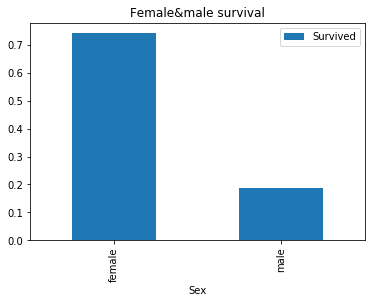

In [9]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar() 
objects = ('male', 'female')
plt.title('Female&male survival')
plt.show()

In [10]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


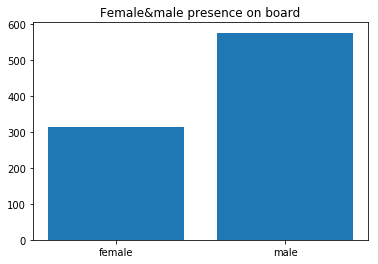

In [11]:
total_male = train[train['Sex']==1].Sex.count()
total_female =  train[train['Sex']==0].Sex.count()
total_people = total_male+total_female

objects = ('female', 'male')
y_pos = np.arange(len(objects))
performance = [total_female, total_male]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('')
plt.title('Female&male presence on board')

plt.show()

<b> Summary </b>  Sex is an important variable.

<h4> How Pclass influenced the survival?</h4>

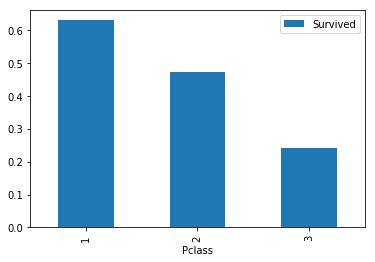

In [12]:
pclass_pivot = train.pivot_table(index="Pclass", values="Survived")
pclass_pivot.plot.bar()
plt.show()

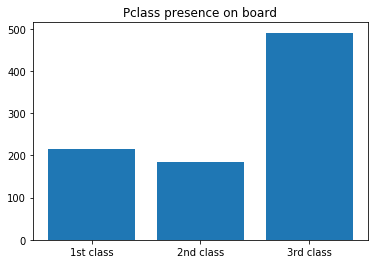

In [13]:
total_pclass1 = train[train['Pclass']==1].Pclass.count()
total_pclass2 = train[train['Pclass']==2].Pclass.count()
total_pclass3 = train[train['Pclass']==3].Pclass.count()


objects = ('1st class', '2nd class', '3rd class')
y_pos = np.arange(len(objects))
performance = [total_pclass1, total_pclass2, total_pclass3]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('')
plt.title('Pclass presence on board')

plt.show()

In [14]:
pclass_pivot = pd.DataFrame(train.pivot_table(index="Pclass", values="Survived", aggfunc=np.sum ))

Total = [total_pclass1, total_pclass2, total_pclass3]
pclass_pivot['Total'] = Total

for record in pclass_pivot[1:]:
    pclass_pivot['Percentage'] = pclass_pivot['Survived']/pclass_pivot['Total']*100
    
pclass_pivot

,Survived,Total,Percentage
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


In [106]:
female_pclass1 = train[train['Pclass']==1]
female_pclass1 = female_pclass1[female_pclass1['Sex']==0].Pclass.count()

female_pclass2 = train[train['Pclass']==2]
female_pclass2 = female_pclass2[female_pclass2['Sex']==0].Pclass.count()

female_pclass3 = train[train['Pclass']==3]
female_pclass3 = female_pclass3[female_pclass3['Sex']==0].Pclass.count()
 
female_num = [female_pclass1, female_pclass2, female_pclass3]

pclass_pivot['Female_num'] = female_num

male_pclass1 = train[train['Pclass']==1]
male_pclass1 = male_pclass1[male_pclass1['Sex']==1].Pclass.count()

male_pclass2 = train[train['Pclass']==2]
male_pclass2 = male_pclass2[male_pclass2['Sex']==1].Pclass.count()

male_pclass3 = train[train['Pclass']==3]
male_pclass3 = male_pclass3[male_pclass3['Sex']==1].Pclass.count()
male_num = [male_pclass1, male_pclass2, male_pclass3]

pclass_pivot['Male_num'] = male_num

pclass_pivot.drop('Fem_percent', axis=1)    

,Survived,Total,Percentage,Female_num,Male_num
Pclass,,,,,
1,136,216,62.962963,94,122
2,87,184,47.282609,76,108
3,119,491,24.236253,144,347


In [122]:
Cl1FSurvived = train[(train['Pclass']==1)&(train['Survived']==1)&(train['Sex']==0)].Pclass.count()
Cl2FSurvived = train[(train['Pclass']==2)&(train['Survived']==1)&(train['Sex']==0)].Pclass.count()
Cl3FSurvived = train[(train['Pclass']==3)&(train['Survived']==1)&(train['Sex']==0)].Pclass.count()

print(Cl1FSurvived,Cl2FSurvived,Cl3FSurvived)
Survived_Fem_by_class = [Cl1FSurvived,Cl2FSurvived,Cl3FSurvived]

pclass_pivot['Survived_Fem_by_class'] = Survived_Fem_by_class
pclass_pivot.drop('Fem_Survived_num', axis=1) 

for record in pclass_pivot[1:]:
    pclass_pivot['Survived_Fem_percent'] = pclass_pivot['Survived_Fem_by_class']/pclass_pivot['Survived']*100
    
for record in pclass_pivot[1:]:
    pclass_pivot['Survived_Male_percent'] =(pclass_pivot['Survived']- pclass_pivot['Survived_Fem_by_class'])/pclass_pivot['Survived']*100
    
pclass_pivot

91 70 72


,Survived,Total,Percentage,Female_num,Fem_percent,Male_num,Fem_Survived_num,Survived_Fem_by_class,Survived_Fem_percent,Survived_Male_percent
Pclass,,,,,,,,,,
1,136,216,62.962963,94,69.117647,122,846,91,66.911765,33.088235
2,87,184,47.282609,76,87.356322,108,874,70,80.459770,19.540230
3,119,491,24.236253,144,121.008403,347,844,72,60.504202,39.495798


Almost all women from 1st and 2nd class survived, but only 60% of women from 3rd class were survived.
But for the male the situation is opposite: 40% survived from the 3rd class, 30% from the 1st class, 20% from the 2nd class

<h4> How age influenced the survaval?</h4>

In [16]:
print(train["Age"].describe())
#age>= 0.42 and age <= 80

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


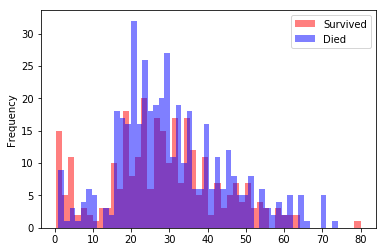

In [17]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [18]:
cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing","Infant","Child", "Teenager", "Young Adult", "Adult", "Senior"]


train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot

,Survived
Age_categories,
Missing,0.293785
Infant,0.704545
Child,0.360000
Teenager,0.428571
Young Adult,0.382682
Adult,0.400000
Senior,0.227273


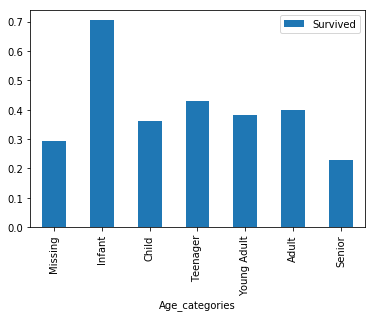

In [19]:
pivot.plot.bar()
plt.show()

Ages by Pclass

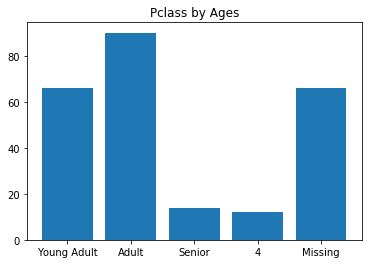

In [163]:
T1_YA = train[(train['Pclass']==1)&(train['Age_categories']=="Young Adult")].Pclass.count()
T1_A = train[(train['Pclass']==1)&(train['Age_categories']=="Adult")].Pclass.count()
T1_S = train[(train['Pclass']==1)&(train['Age_categories']=="Senior")].Pclass.count()
T1_T = train[(train['Pclass']==1)&(train['Age_categories']=="Teenager")].Pclass.count()
T1_I = train[(train['Pclass']==1)&(train['Age_categories']=="Infant")].Pclass.count()
T1_M = train[(train['Pclass']==1)&(train['Age_categories']=="Missing")].Pclass.count()

objects = ("Young Adult", "Adult", "Senior", 4, "Missing" )
y_pos = np.arange(len(objects))
performance = [T1_YA, T1_A, T1_S, T1_T, T1]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('')
plt.title('Pclass by Ages')

plt.show()

In [71]:
train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_0,Sex_1,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()

In [76]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train[columns], train["Survived"])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']
all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [80]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8100558659217877


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
from sklearn.model_selection import cross_val_score
import numpy as np
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.8        0.81111111 0.7752809  0.87640449 0.80898876 0.80898876
 0.76404494 0.76404494 0.83146067 0.80681818]
0.804714277607536


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [84]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyError: "['Sex_1', 'Sex_0'] not in index"

In [85]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission.csv",index=False)

NameError: name 'holdout_predictions' is not defined